## 1) Feedforward neural network
Firstly, run the simple feedforward neural network on the 12 event paramters

Note: To run this notebook, notebook file must be located in 'invisible-higgs/src/' folder location.

1.1) Import necesary python libraries and code from other files in this project

In [1]:
# Code from other files in the repo
import models.sequential_models as sequential_models
import utilities.plotlib as plotlib

# Python libraries
import numpy as np
import time
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

Running tensorflow on CPU


1.2) Prepare the data 

In [2]:
data_to_collect = ['ttH125_part1-1', 
                   'TTTo2L2Nu', 
                   'TTToHadronic', 
                   'TTToSemiLeptonic']

event_data = np.load('preprocessed_event_data.npy', allow_pickle=True)
event_labels = np.load('preprocessed_event_labels.npy', allow_pickle=True)
sample_weight = np.load('preprocessed_sample_weights.npy', allow_pickle=True)

test_fraction = 0.2
data_train, data_test, labels_train, labels_test, sw_train, sw_test  = \
    train_test_split(event_data, event_labels, 
                     sample_weight, test_size=test_fraction)

1.3) Create the neural network model and train it

In [3]:
model = sequential_models.base(42, 4)

print("Fitting sequential model on event training data...")
START = time.time()
history = model.fit(data_train, labels_train, 
                    validation_data=(data_test, labels_test), 
                    sample_weight=sw_train, epochs=16, verbose=2)
print(f"    Elapsed training time: {time.time()-START:0.2f}s")

Fitting sequential model on event training data...
Epoch 1/16
8395/8395 - 5s - loss: 76.1904 - accuracy: 0.6371 - val_loss: 0.6096 - val_accuracy: 0.6683
Epoch 2/16
8395/8395 - 5s - loss: 75.0390 - accuracy: 0.6479 - val_loss: 0.6221 - val_accuracy: 0.6607
Epoch 3/16
8395/8395 - 5s - loss: 74.7990 - accuracy: 0.6493 - val_loss: 0.6105 - val_accuracy: 0.6700
Epoch 4/16
8395/8395 - 4s - loss: 74.6768 - accuracy: 0.6511 - val_loss: 0.6033 - val_accuracy: 0.6758
Epoch 5/16
8395/8395 - 4s - loss: 74.4082 - accuracy: 0.6528 - val_loss: 0.6159 - val_accuracy: 0.6635
Epoch 6/16
8395/8395 - 4s - loss: 74.1675 - accuracy: 0.6524 - val_loss: 0.6616 - val_accuracy: 0.6239
Epoch 7/16
8395/8395 - 4s - loss: 74.0968 - accuracy: 0.6528 - val_loss: 0.6275 - val_accuracy: 0.6566
Epoch 8/16
8395/8395 - 4s - loss: 73.9753 - accuracy: 0.6537 - val_loss: 0.6306 - val_accuracy: 0.6548
Epoch 9/16
8395/8395 - 4s - loss: 73.8984 - accuracy: 0.6545 - val_loss: 0.6402 - val_accuracy: 0.6424
Epoch 10/16
8395/8395 

1.4) Evaluate the neural network on the test data

In [4]:
test_loss, test_acc = model.evaluate(data_test, labels_test, verbose=2)
print(f"    Test accuracy: {test_acc:0.5f}")

2099/2099 - 1s - loss: 0.6217 - accuracy: 0.6637
    Test accuracy: 0.66370


1.5) Plot the model training history

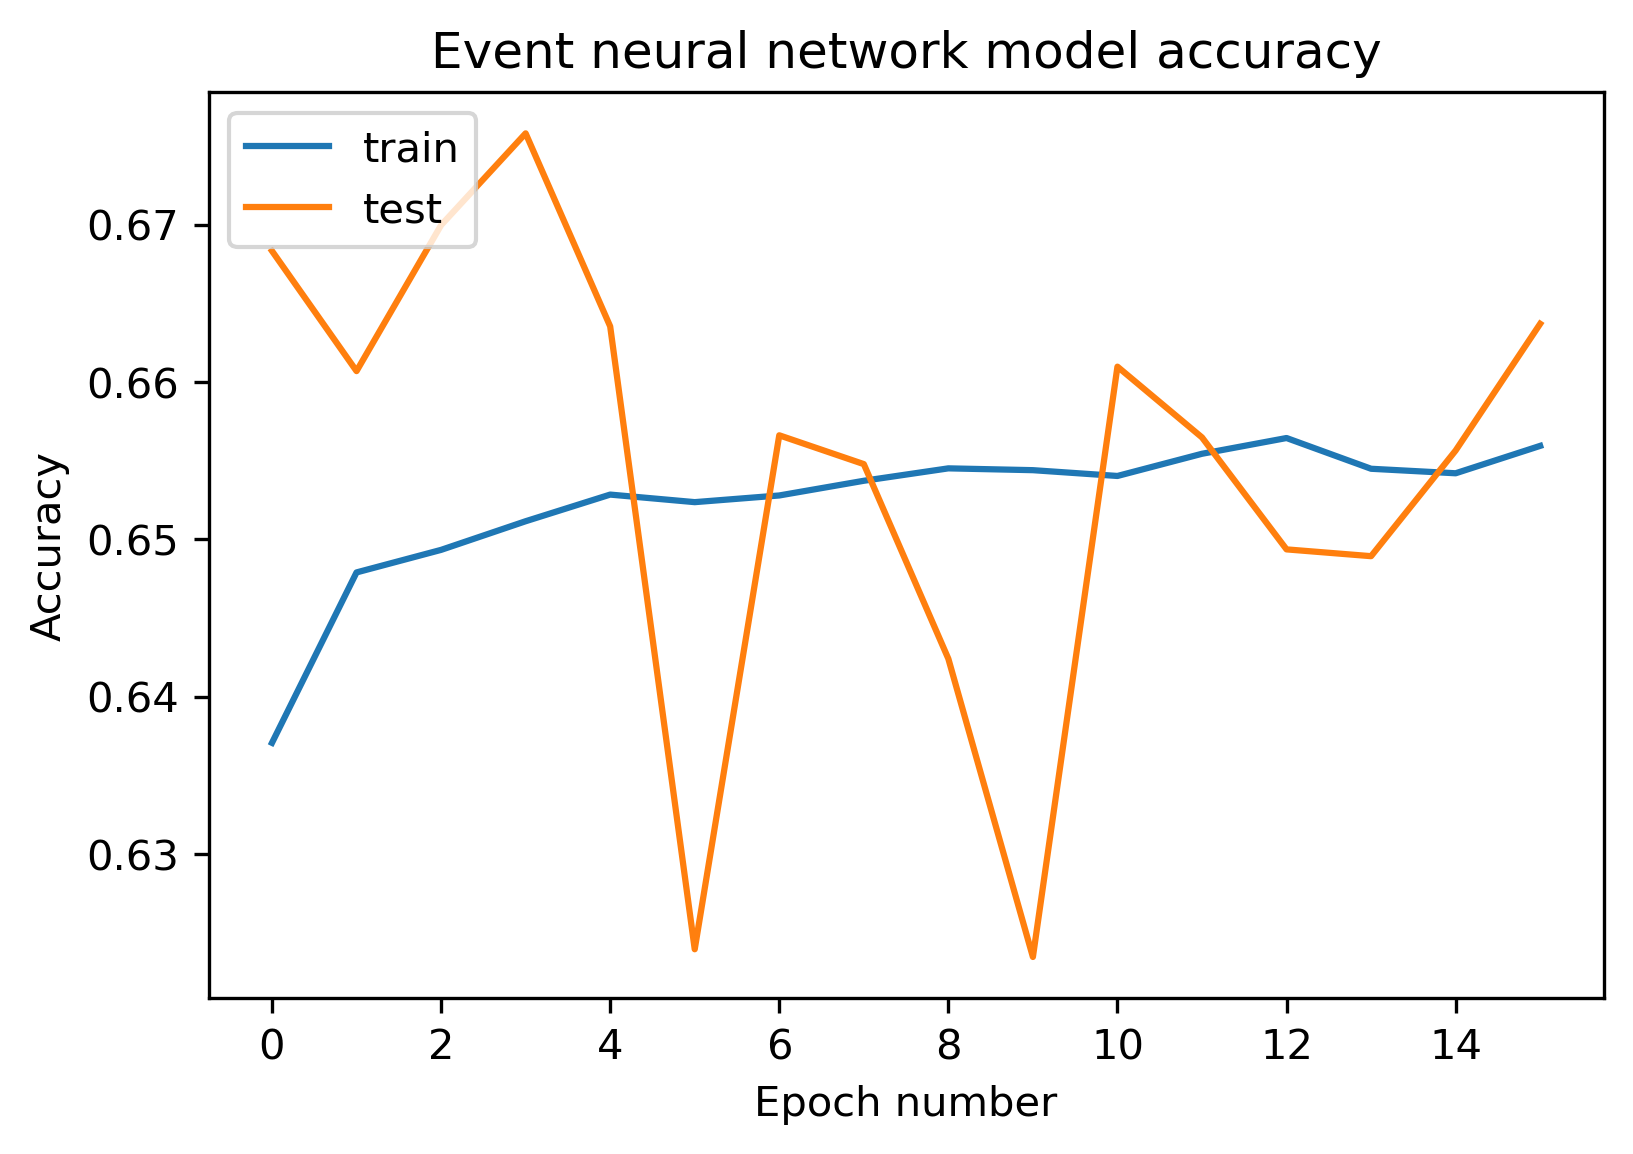

In [5]:
# Plot training history
fig1 = plotlib.training_history_plot(history, 'Event neural network model accuracy')

1.6) Create and plot the confusion matrix for the model predictions

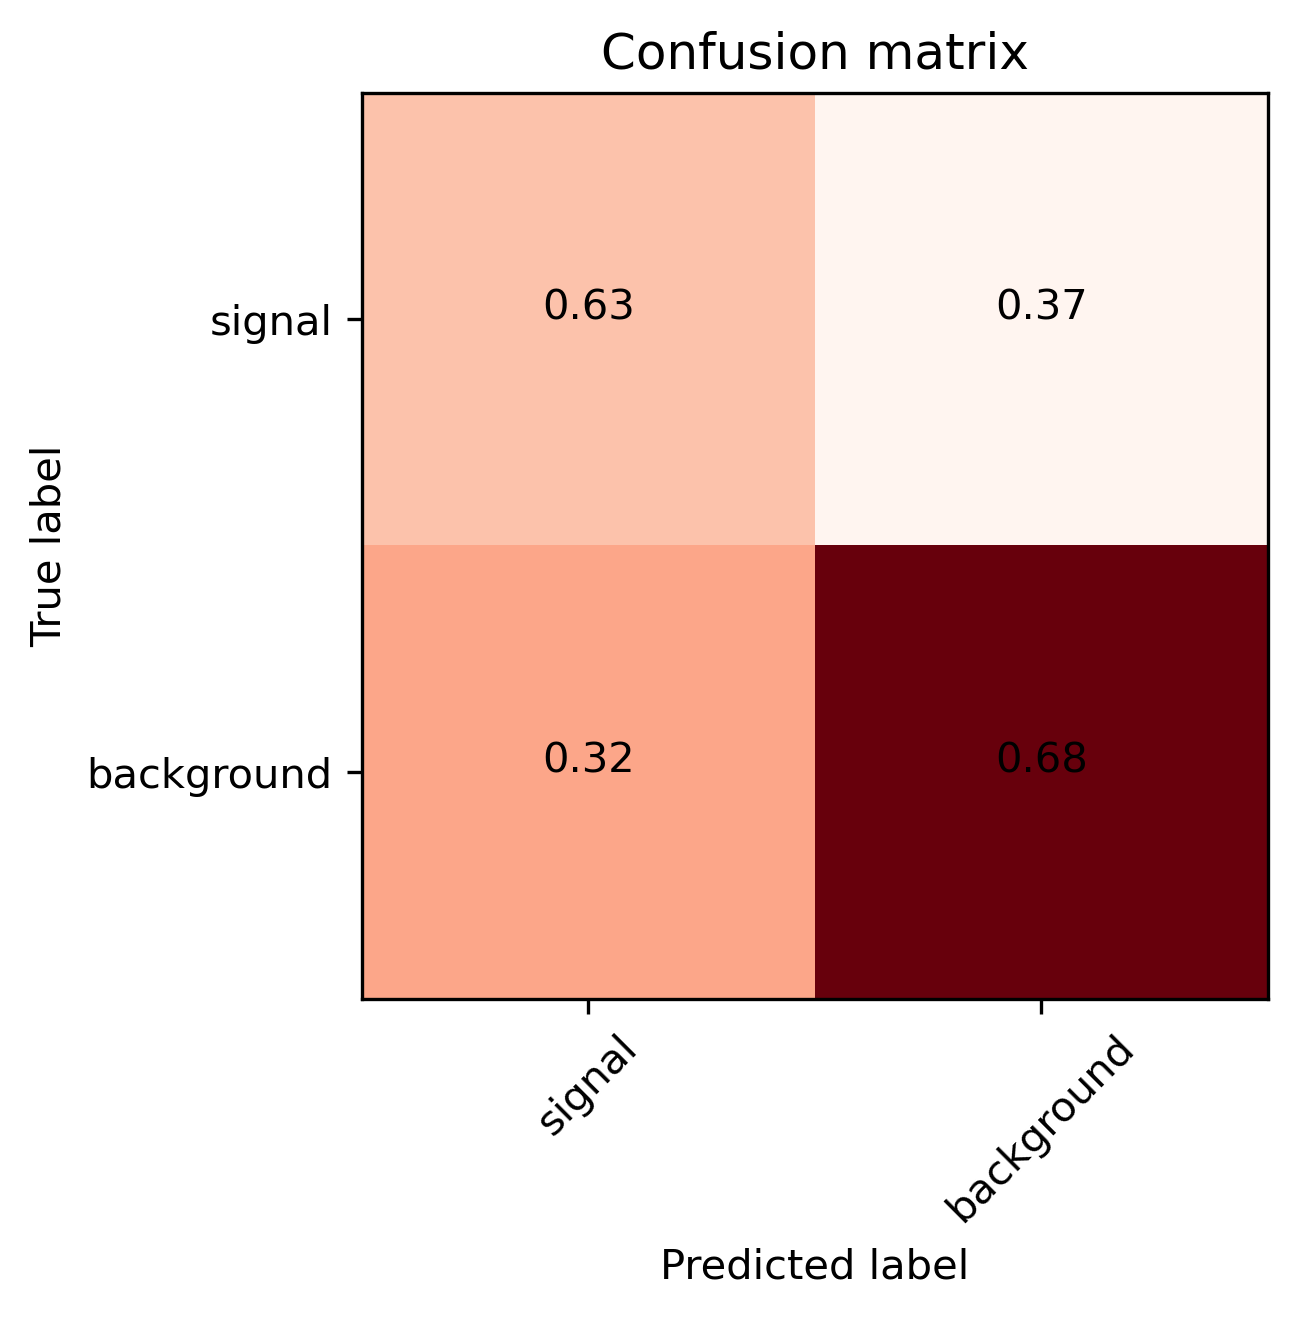

In [6]:
# Make confsuion matrix
labels_pred = model.predict(data_test)
labels_pred = np.argmax(labels_pred, axis=1)
cm = confusion_matrix(labels_test, labels_pred)
class_names = ['signal', 'background']
title = 'Confusion matrix'

# Plot confusion matrix
fig2 = plotlib.confusion_matrix(cm, class_names, title)

1.7) Make and plot the ROC curve of the model

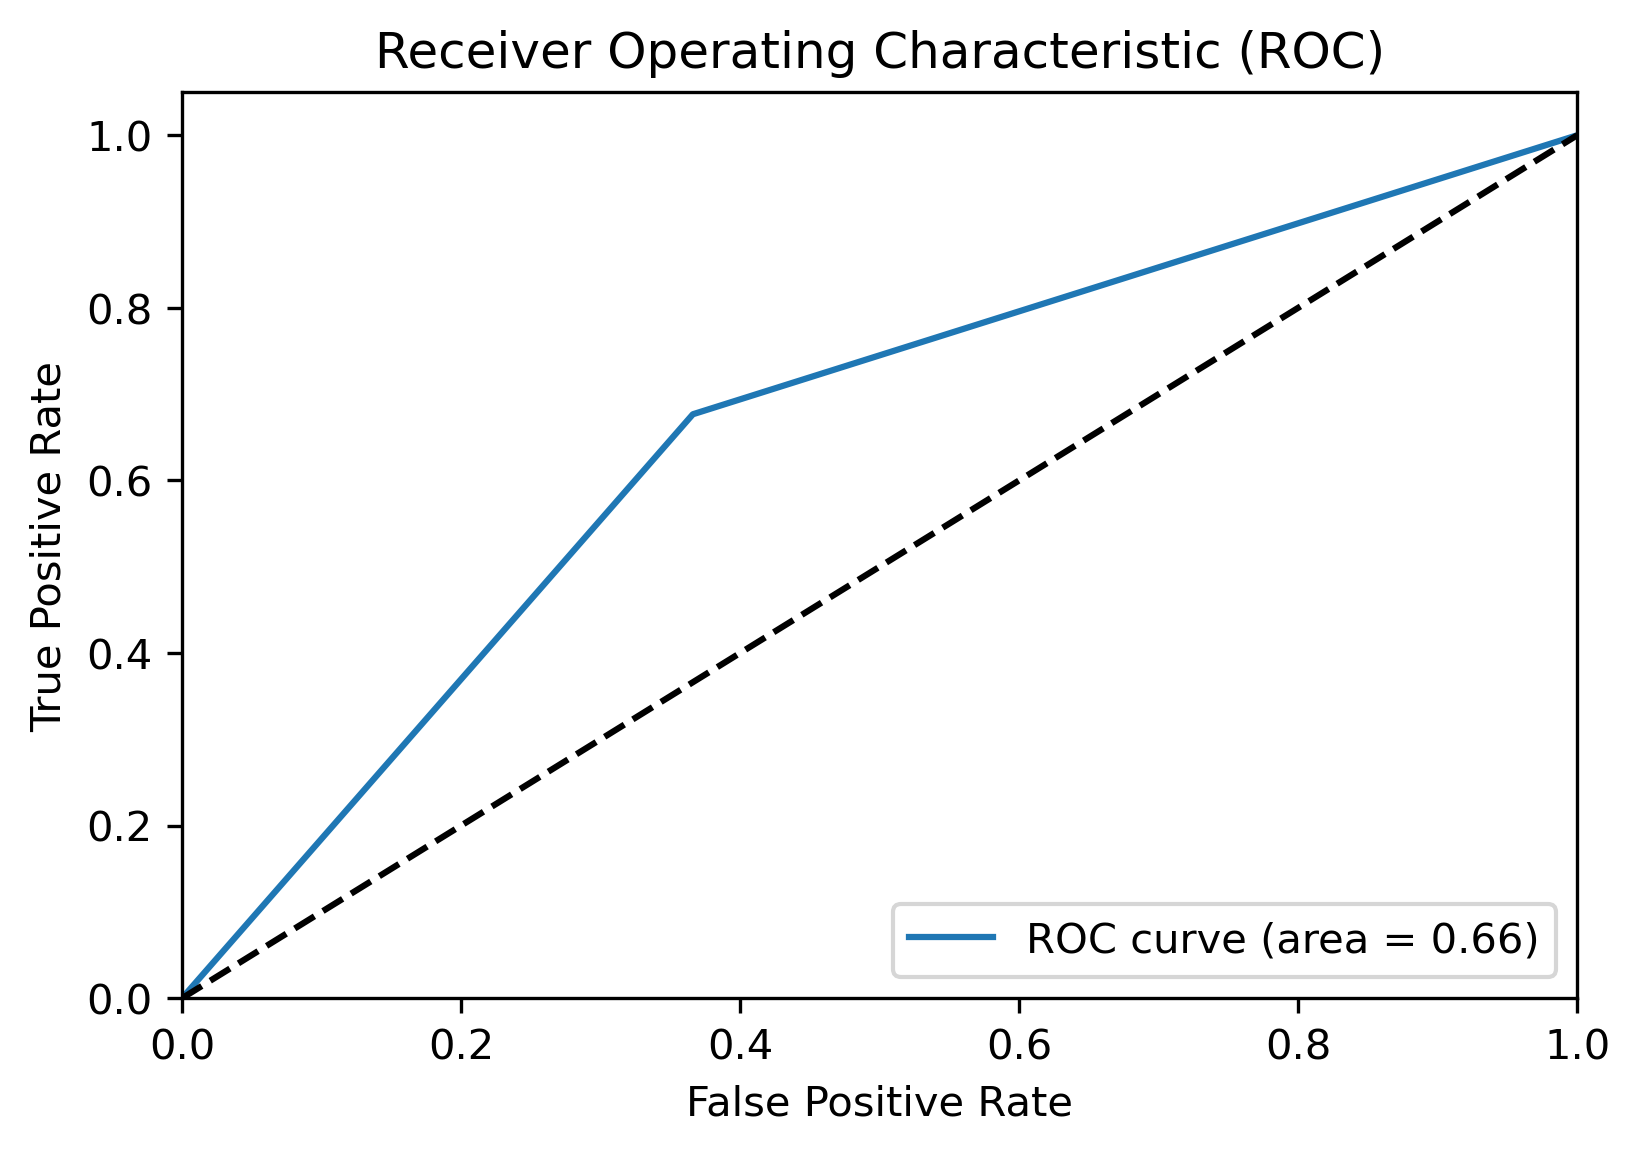

In [7]:
# Plot ROC curve
fig3 = plotlib.plot_roc(labels_pred,labels_test)

## 2) Recurrent neural network
Now run the RNN for the jet data

2.1) Import additional code needed for RNN

In [8]:
# Code from other files in the repo
import models.recurrent_models as recurrent_models
from utilities.data_preprocessing import make_ragged_tensor

# Python libraries
import pandas as pd

Running tensorflow on CPU


2.2) Import and split the RNN data

In [9]:
# Load in data
df_jet_data = pd.read_hdf('preprocessed_jet_data.hdf')
event_labels = np.load('preprocessed_event_labels.npy', allow_pickle=True)
sample_weight = np.load('preprocessed_sample_weights.npy', allow_pickle=True)

test_fraction = 0.2
data_train, data_test, labels_train, labels_test_rnn, sw_train, sw_test  = \
    train_test_split(df_jet_data, event_labels, 
                     sample_weight, test_size=test_fraction)

2.3) Create ragged tensors

In [10]:
data_train_rt = make_ragged_tensor(data_train)
data_test_rt = make_ragged_tensor(data_test)
print(f"Shape: {data_train_rt.shape}")
print(f"Number of partitioned dimensions: {data_train_rt.ragged_rank}")
print(f"Flat values shape: {data_train_rt.flat_values.shape}")

Shape: (268612, None, 6)
Number of partitioned dimensions: 1
Flat values shape: (1676666, 6)


2.4) Create the recurrent neural network model and train it

In [11]:
model = recurrent_models.base()

print("Fitting RNN model on jet training data...")
START = time.time()
history = model.fit(data_train_rt, labels_train, 
                    validation_data=(data_test_rt, labels_test_rnn), 
                    sample_weight=sw_train, epochs=16, verbose=2)
print(f"    Elapsed training time: {time.time()-START:0.2f}s")

Fitting RNN model on jet training data...
Epoch 1/16
8395/8395 - 27s - loss: 85.6946 - accuracy: 0.5881 - val_loss: 0.6656 - val_accuracy: 0.5730
Epoch 2/16
8395/8395 - 27s - loss: 85.0222 - accuracy: 0.5942 - val_loss: 0.6768 - val_accuracy: 0.5716
Epoch 3/16
8395/8395 - 29s - loss: 84.6459 - accuracy: 0.5967 - val_loss: 0.6436 - val_accuracy: 0.6198
Epoch 4/16
8395/8395 - 29s - loss: 84.0900 - accuracy: 0.6006 - val_loss: 0.6677 - val_accuracy: 0.5820
Epoch 5/16
8395/8395 - 29s - loss: 83.4746 - accuracy: 0.6113 - val_loss: 0.6583 - val_accuracy: 0.6056
Epoch 6/16
8395/8395 - 29s - loss: 83.2180 - accuracy: 0.6143 - val_loss: 0.6091 - val_accuracy: 0.6826
Epoch 7/16
8395/8395 - 30s - loss: 83.0397 - accuracy: 0.6186 - val_loss: 0.6410 - val_accuracy: 0.6354
Epoch 8/16
8395/8395 - 29s - loss: 82.8885 - accuracy: 0.6203 - val_loss: 0.6517 - val_accuracy: 0.6207
Epoch 9/16
8395/8395 - 30s - loss: 82.7492 - accuracy: 0.6215 - val_loss: 0.6594 - val_accuracy: 0.6060
Epoch 10/16
8395/8395 

2.5) Evaluate the neural network on the test data

In [12]:
test_loss, test_acc = model.evaluate(data_test_rt, labels_test_rnn, verbose=2)
print(f"    Test accuracy: {test_acc:0.5f}")

2099/2099 - 3s - loss: 0.6596 - accuracy: 0.6000
    Test accuracy: 0.60001


2.6) Plot the model training history

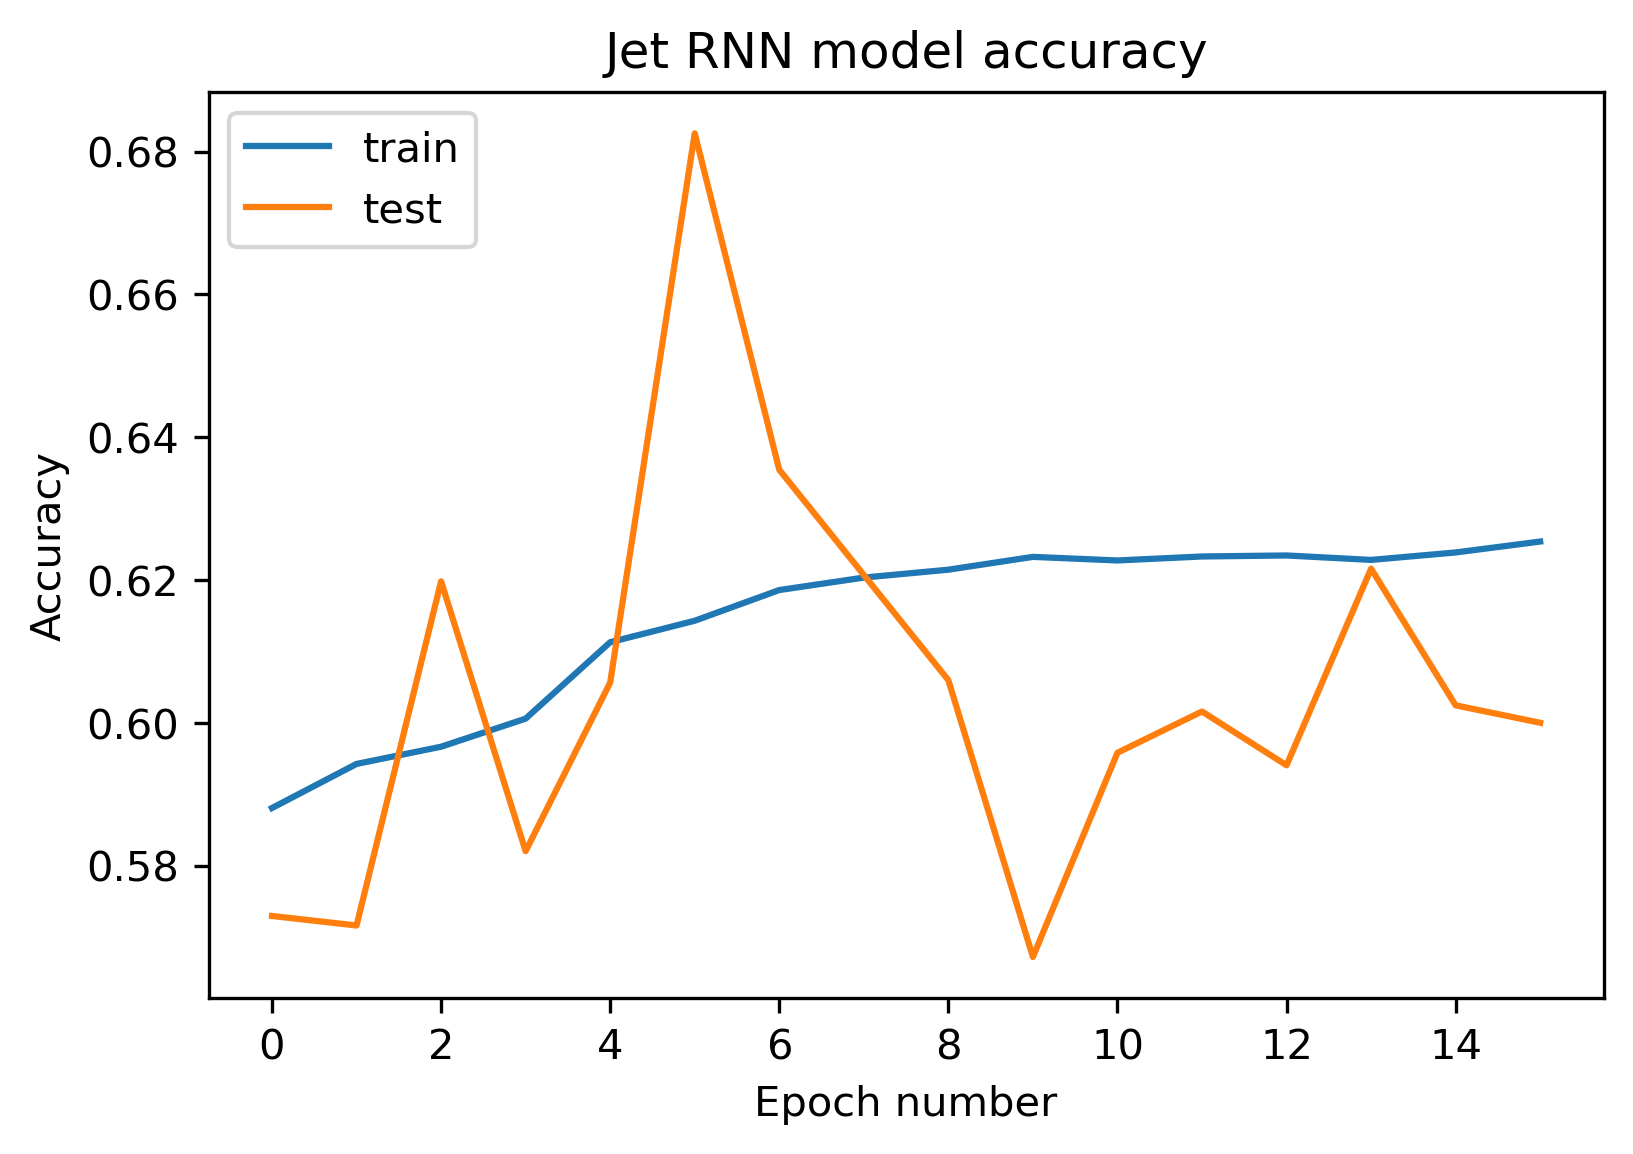

In [13]:
# Plot training history
fig4 = plotlib.training_history_plot(history, 'Jet RNN model accuracy')

2.7) Create and plot the confusion matrix for the model predictions

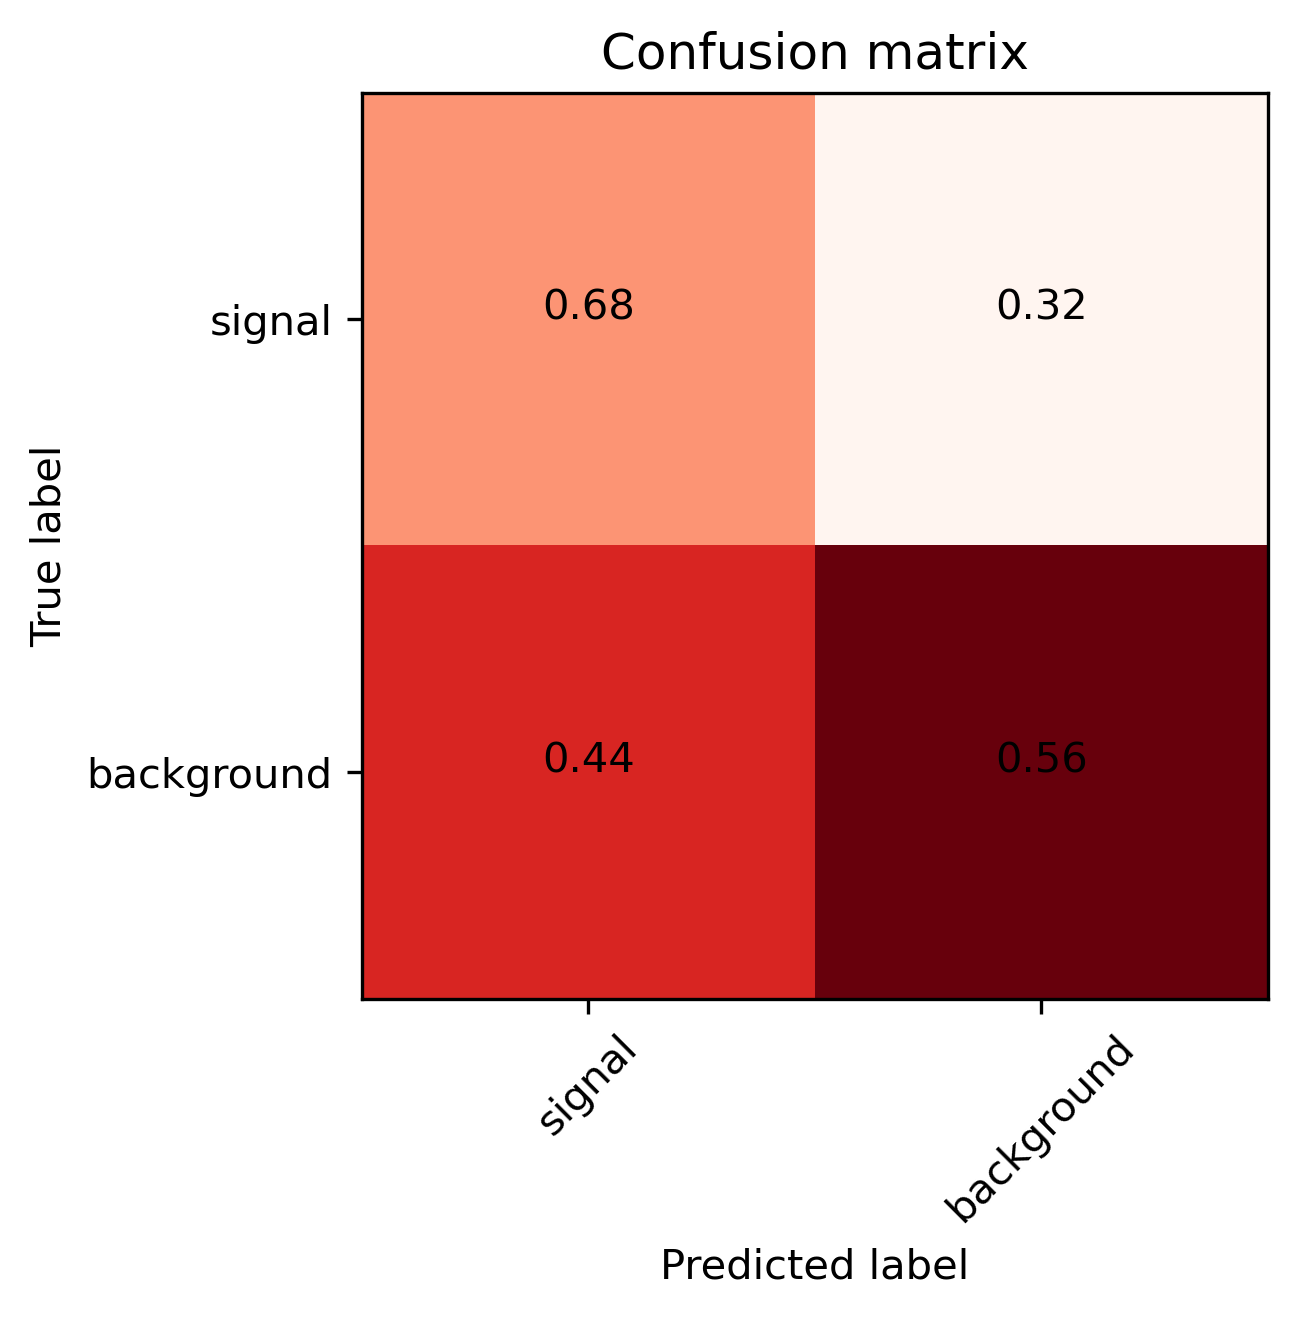

In [14]:
# Get model predictions
labels_pred_rnn = model.predict(data_test_rt)
labels_pred_rnn = np.argmax(labels_pred_rnn, axis=1)

# Make confsuion matrix
cm = confusion_matrix(labels_test_rnn, labels_pred_rnn)
class_names = ['signal', 'background']
title = 'Confusion matrix'

# Plot confusion matrix
fig2 = plotlib.confusion_matrix(cm, class_names, title)

2.8) Make and plot the ROC curve of the model

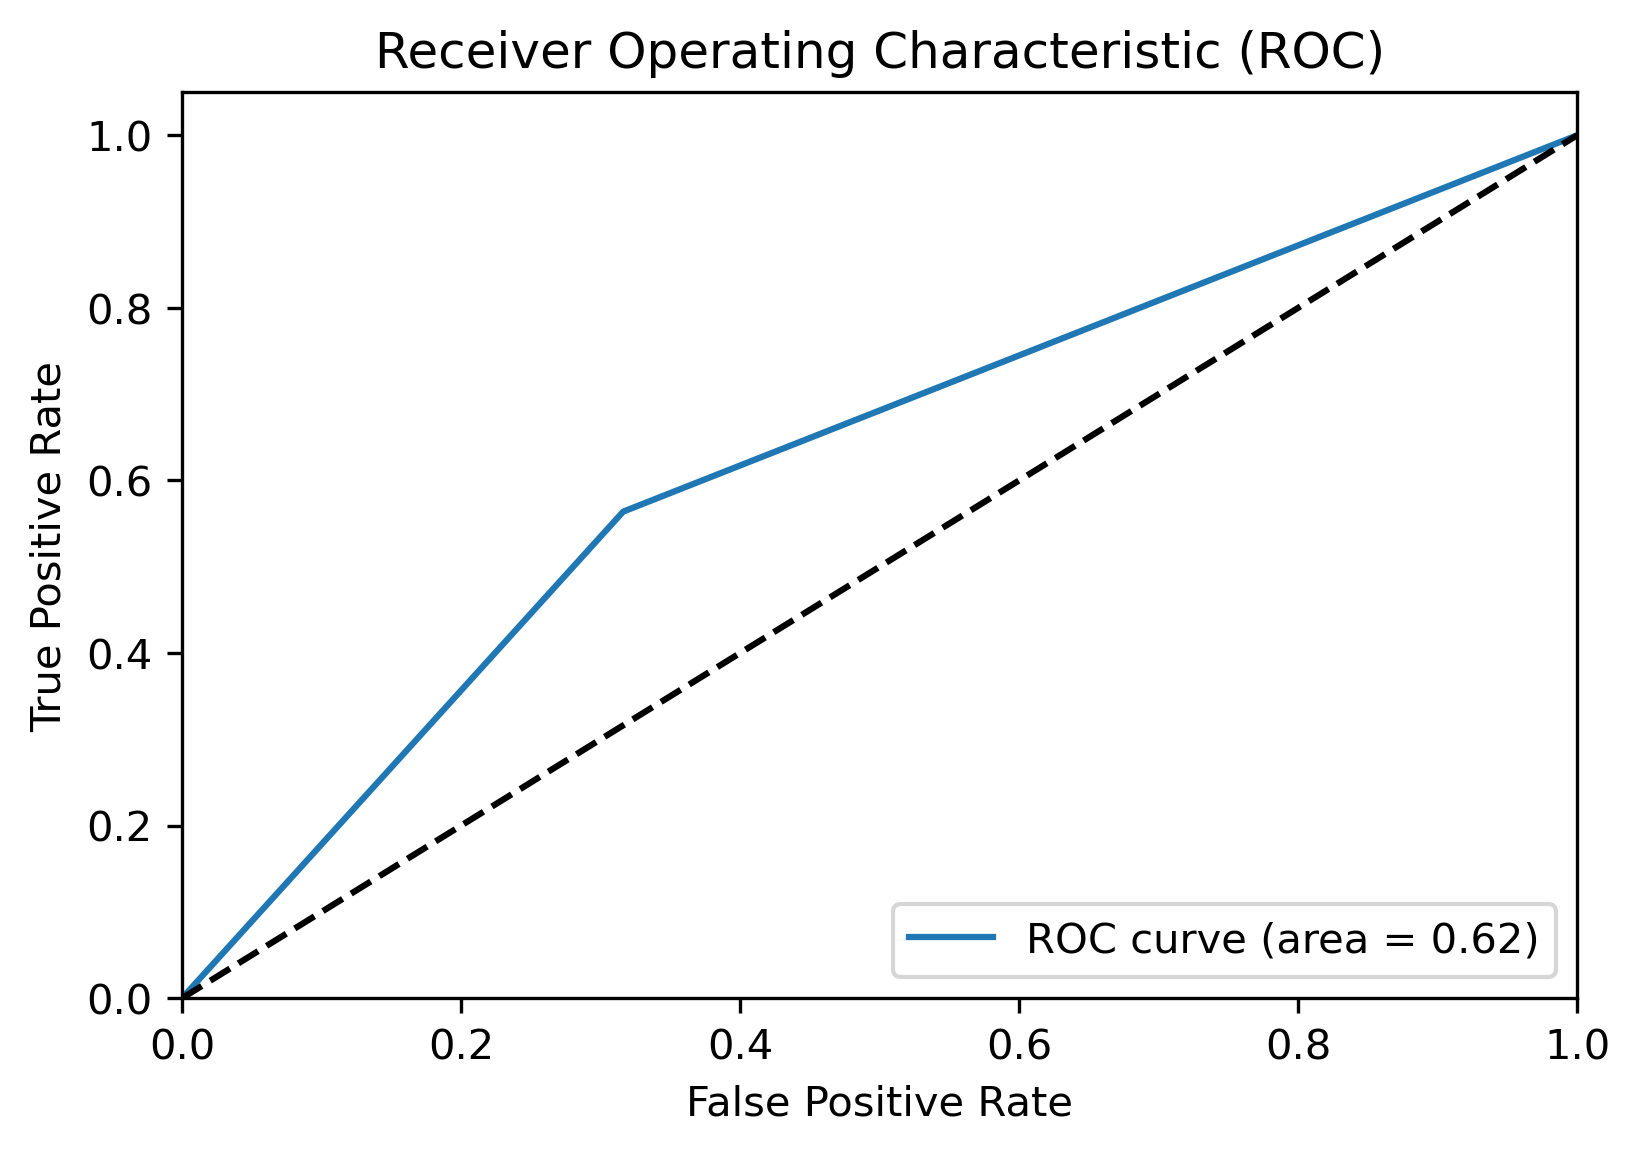

In [15]:
# Plot ROC curve
fig = plotlib.plot_roc(labels_pred_rnn, labels_test_rnn)

## Combine the ROC curves

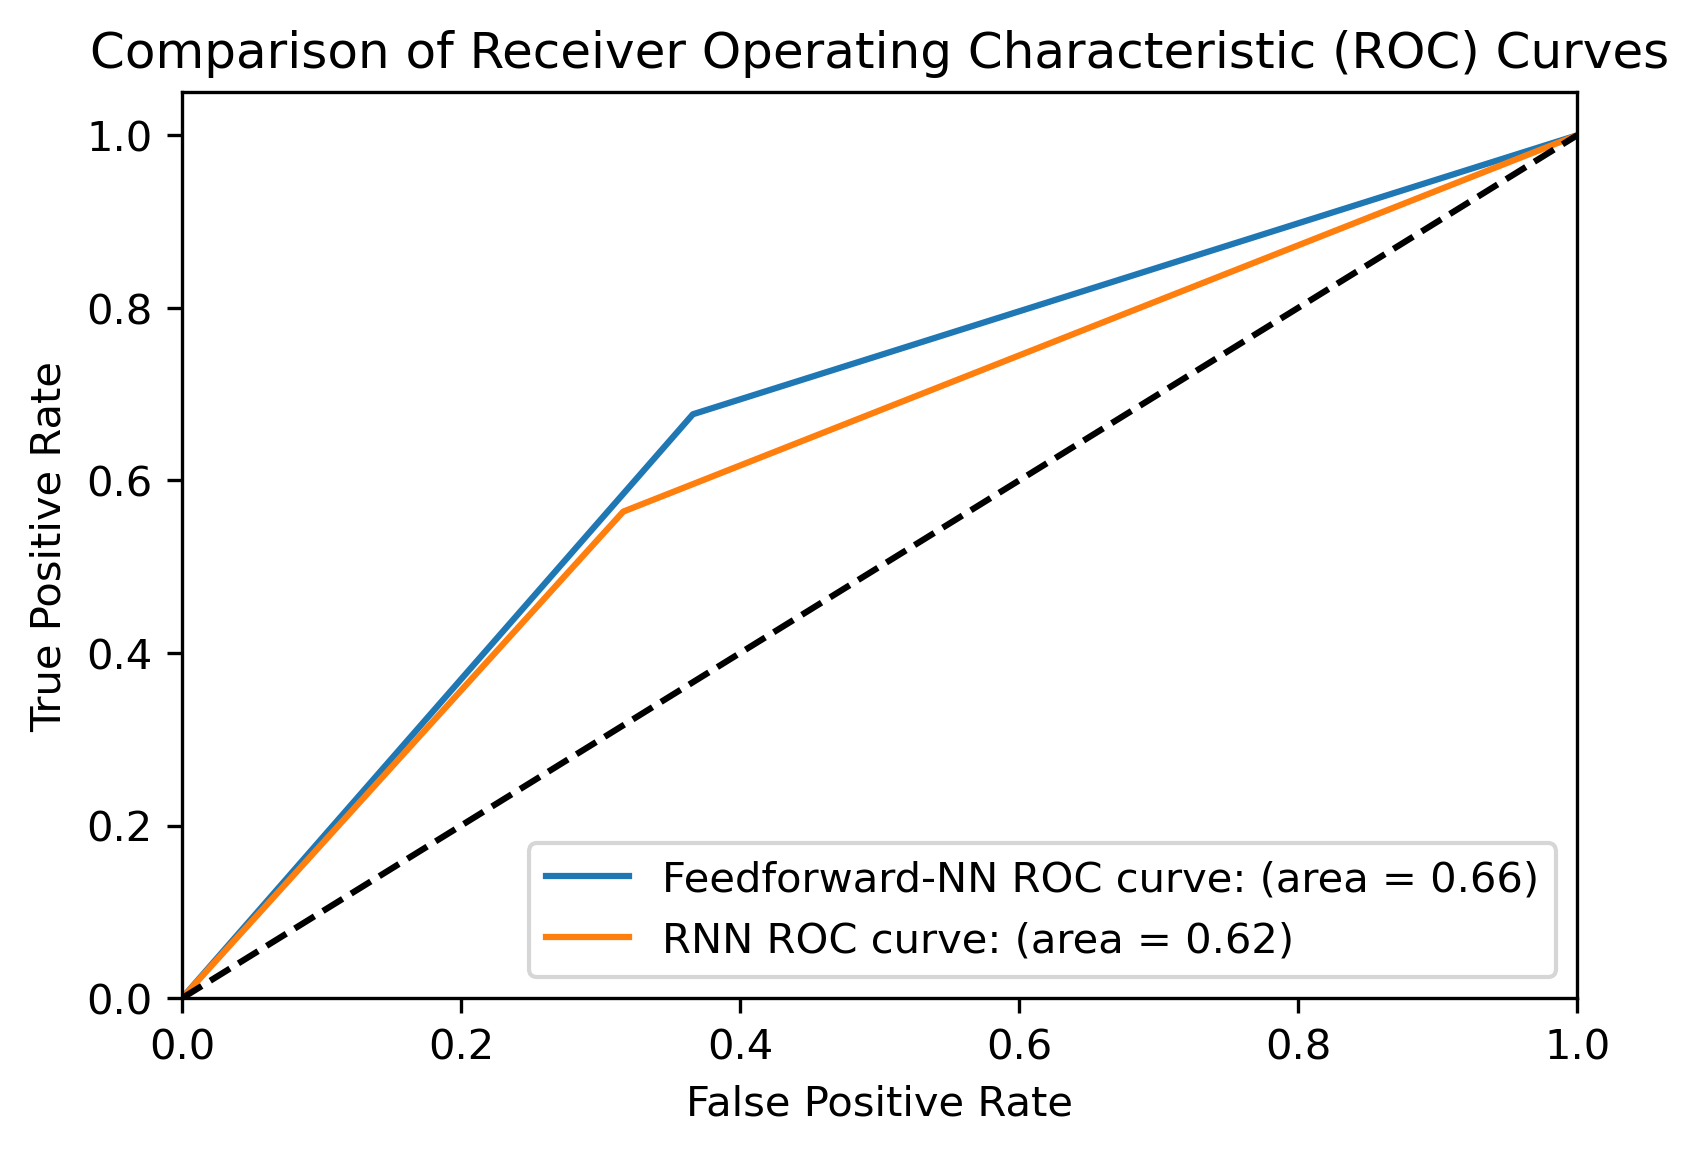

In [18]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

figsize=(6, 4)
dpi=300

fpr1, tpr1, _ = roc_curve(labels_test, labels_pred)
fpr2, tpr2, _ = roc_curve(labels_test_rnn, labels_pred_rnn)
roc_auc1 = auc(fpr1, tpr1)
roc_auc2 = auc(fpr2, tpr2)

fig = plt.figure(figsize=figsize, dpi=dpi)

plt.plot(fpr1, tpr1, label='Feedforward-NN ROC curve: (area = %0.2f)' % roc_auc1)
plt.plot(fpr2, tpr2, label='RNN ROC curve: (area = %0.2f)' % roc_auc2)
plt.plot([0, 1], [0, 1], 'k--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])

plt.title('Comparison of Receiver Operating Characteristic (ROC) Curves')
plt.legend(loc="lower right")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()